In [15]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from math import *
import os
from mpl_toolkits import mplot3d

# %matplotlib notebook
%matplotlib inline

In [16]:
ECHELLE = 32
SEUIL = 100

In [17]:
# upload images and masks

path_original_img_train = 'Dataset8_Abdomen/train/original_images/'
path_masks_img_train = 'Dataset8_Abdomen/train/skin_masks/'

liste_images = [ f for f in os.listdir(path_original_img_train) if os.path.isfile(os.path.join(path_original_img_train,f)) ]

t_liste_images_originals = []
t_liste_images_masks = []

for img in liste_images:
    image = cv.imread(os.path.join(path_original_img_train, img))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    t_liste_images_originals.append(image)
    
for img in liste_images:
    image_mask = cv.imread(os.path.join(path_masks_img_train, img.split('.')[0]+'.png'), cv.IMREAD_GRAYSCALE)
    t_liste_images_masks.append(image_mask)
    
t_liste_images_originals = np.array(t_liste_images_originals)
t_liste_images_masks = np.array(t_liste_images_masks)
print(t_liste_images_originals.shape)
print(t_liste_images_masks.shape)

(1200, 227, 227, 3)
(1200, 227, 227)


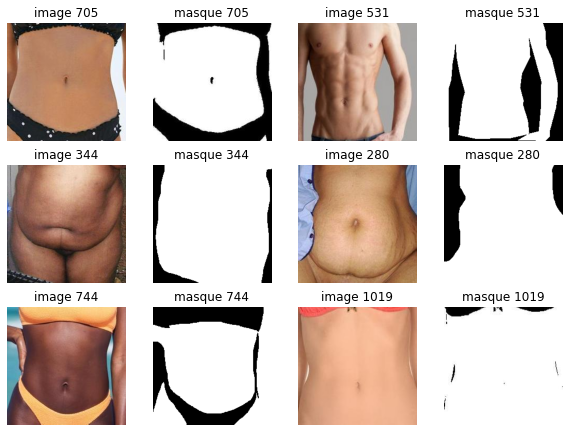

In [18]:
# On affiche quelques images et leurs masques

plt.figure(figsize=(10, 10))
for k, i in np.ndenumerate(np.random.randint(t_liste_images_originals.shape[0], size=6)):
    ax = plt.subplot(4, 4, 2 * k[0] + 1)
    plt.imshow(t_liste_images_originals[i], cmap='gray')
    plt.title('image {}'.format(i))
    plt.axis("off")
    x = plt.subplot(4, 4, 2 * k[0] + 2)
    plt.imshow(t_liste_images_masks[i], cmap='gray')
    plt.title('masque {}'.format(i))
    plt.axis("off")

In [19]:
# On change l'espace de couleur de RGB à HSV

def RGB_to_HSV(t_RGB):
    t_lab = [0] * t_RGB.shape[0]
    for i, img in enumerate(t_RGB):
        t_lab[i] = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    return np.array(t_lab)

In [20]:
t_liste_images_hsv = RGB_to_HSV(t_liste_images_originals)

(-0.5, 226.5, 226.5, -0.5)

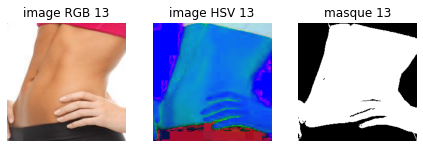

In [21]:
# Première image dans l'espace Lab

i = 13

plt.figure(figsize=(10, 10))
ax = plt.subplot(4, 4, 1)
plt.imshow(t_liste_images_originals[i])
plt.title('image RGB {}'.format(i))
plt.axis("off")

ax = plt.subplot(4, 4, 2)
plt.imshow(t_liste_images_hsv[i])
plt.title('image HSV {}'.format(i))
plt.axis("off")

ax = plt.subplot(4, 4, 3)
plt.imshow(t_liste_images_masks[i], cmap='gray')
plt.title('masque {}'.format(i))
plt.axis("off")

In [36]:
h_channel,s_channel,v_channel = cv.split(t_liste_images_hsv[13])

print()
print('valeur minimale d\'un dans le chanel H : {}'.format(np.array(h_channel).min()))
print('valeur maximale d\'un dans le chanel H : {}'.format(np.array(h_channel).max()))
print()
print('valeur minimale d\'un dans le chanel S : {}'.format(np.array(s_channel).min()))
print('valeur maximale d\'un dans le chanel S : {}'.format(np.array(s_channel).max()))
print()
print('valeur minimale d\'un dans le chanel V : {}'.format(np.array(v_channel).min()))
print('valeur maximale d\'un dans le chanel V : {}'.format(np.array(v_channel).max()))


valeur minimale d'un dans le chanel H : 0
valeur maximale d'un dans le chanel H : 179

valeur minimale d'un dans le chanel S : 0
valeur maximale d'un dans le chanel S : 255

valeur minimale d'un dans le chanel V : 20
valeur maximale d'un dans le chanel V : 255


In [37]:
# On convertie l'intervalle dans lequel les pixels prennent leurs valeurs pour les dimensions s et v

def convertHSV256toHSVx(t_img):
    temp = [0] * 256
    for i in range(256):
        temp[i] = floor(i / (256/ECHELLE))
    
    for index, img in enumerate(t_img):
        h, w, d = img.shape
        image = np.asarray(np.zeros((h, w, d), dtype=np.uint8))

        for i in range(h):
            for j in range(w):
                image[i, j][1] = temp[img[i, j][1]]
                image[i, j][0] = img[i, j][0]
                image[i, j][2] = temp[img[i, j][2]]
        t_img[index] = image
        
    return t_img

In [38]:
img_hsv_convert = convertHSV256toHSVx(t_liste_images_hsv)

In [40]:
h_channel,s_channel,v_channel = cv.split(img_hsv_convert[13])

print()
print('valeur minimale d\'un dans le chanel H : {}'.format(np.array(h_channel).min()))
print('valeur maximale d\'un dans le chanel H : {}'.format(np.array(h_channel).max()))
print()
print('valeur minimale d\'un dans le chanel S : {}'.format(np.array(s_channel).min()))
print('valeur maximale d\'un dans le chanel S : {}'.format(np.array(s_channel).max()))
print()
print('valeur minimale d\'un dans le chanel V : {}'.format(np.array(v_channel).min()))
print('valeur maximale d\'un dans le chanel V : {}'.format(np.array(v_channel).max()))


valeur minimale d'un dans le chanel H : 0
valeur maximale d'un dans le chanel H : 179

valeur minimale d'un dans le chanel S : 0
valeur maximale d'un dans le chanel S : 31

valeur minimale d'un dans le chanel V : 2
valeur maximale d'un dans le chanel V : 31


(-0.5, 226.5, 226.5, -0.5)

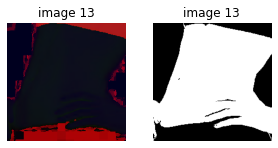

In [42]:
# Première image dans l'espace Lab avec les intervalles de a et b convertis

i = 13

plt.figure(figsize=(10, 10))
ax = plt.subplot(4, 4, 1)
plt.imshow(img_hsv_convert[i])
plt.title('image {}'.format(i))
plt.axis("off")

ax = plt.subplot(4, 4, 2)
plt.imshow(t_liste_images_masks[i], cmap='gray')
plt.title('image {}'.format(i))
plt.axis("off")

In [43]:
# fonction pour calculer l'histogramme peau

def HistogrammePeau(t_images_hsv, t_masque):
    z = np.zeros((180, ECHELLE))
    
    for index, img in enumerate(t_images_hsvsv):
        s_channel, h_channel, v_channel = cv.split(img)
        masque = t_masque[index]
    
        x, y = s_channel.shape
        
        for i in range(x):
            for j in range(y):
                if masque[i][j] > SEUIL:
                    x_ = s_channel[i, j]
                    y_ = h_channel[i, j]
                    z[x_, y_] += 1
    return z / sum(sum(z)), sum(sum(z))


# fonction pour calculer l'histogramme non peau

def HistogrammeNonPeau(t_images_hsv, t_masque):
    z = np.zeros((180, ECHELLE))
    
    for index, img in enumerate(t_images_hsvsv):
        s_channel, h_channel, v_channel = cv.split(img)
        masque = t_masque[index]
    
        x, y = s_channel.shape
        
        for i in range(x):
            for j in range(y):
                if masque[i][j] < SEUIL:
                    x_ = s_channel[i, j]
                    y_ = h_channel[i, j]
                    z[x_, y_] += 1
    return z / sum(sum(z)), sum(sum(z))

In [45]:
y = np.linspace(0, 180-1, 180)
x = np.linspace(0, ECHELLE-1, ECHELLE)

X, Y = np.meshgrid(x, y)

Z_peau, total_peau = HistogrammePeau(img_hsv_convert, t_liste_images_masks)
Z_non_peau, total_non_peau = HistogrammeNonPeau(img_hsv_convert, t_liste_images_masks)

In [46]:
print('Nombre total de pixel peau: {}'.format(int(total_peau)))
print('Nombre total de pixel non peau: {}'.format(int(total_non_peau)))

Nombre total de pixel peau: 40599139
Nombre total de pixel non peau: 21234970


Nous constatons que le nombre de pixels peau est très supérieur au nombre de pixel non peau. Nous allons alors augmenter le nombre de pixel non peau avec des images de la nature sélectionnées aléatoirement

In [47]:
# On augmente le nombre de pixels non peau

path_other_img_train = 'complement/'

liste_images = [ f for f in os.listdir(path_other_img_train) if os.path.isfile(os.path.join(path_other_img_train,f)) ]

t_liste_images_orther = []

for img in liste_images:
    image = cv.imread(os.path.join(path_other_img_train, img))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    t_liste_images_orther.append(image)
    
t_liste_images_orther = np.array(t_liste_images_orther)
print(t_liste_images_orther.shape)

(331, 256, 256, 3)


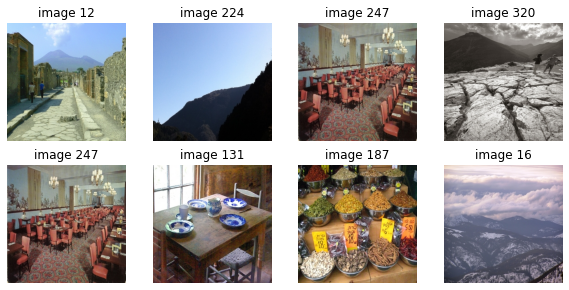

In [48]:
# On affiche quelques images

plt.figure(figsize=(10, 10))
for k, i in np.ndenumerate(np.random.randint(t_liste_images_orther.shape[0], size=8)):
    ax = plt.subplot(4, 4, k[0] + 1)
    plt.imshow(t_liste_images_orther[i])
    plt.title('image {}'.format(i))
    plt.axis("off")

In [49]:
# On augmente le nombre de pixel non peau

t_liste_others_hsv = RGB_to_HSV(t_liste_images_orther)

img_other_hsv_convert = convertHSV256toHSVx(t_liste_others_hsv)

# fonction pour augmenter le nombre de pixel dans l'histogramme non peau

def HistogrammeNonPeauPlus(t_images_hsv, t_masque, t_autres):
    z = np.zeros((180, ECHELLE))
    
    for index, img in enumerate(t_images_hsv):
        h_channel, s_channel, v_channel = cv.split(img)
        masque = t_masque[index]
    
        x, y = h_channel.shape
        
        for i in range(x):
            for j in range(y):
                if masque[i][j] < SEUIL:
                    x_ = h_channel[i, j]
                    y_ = s_channel[i, j]
                    z[x_, y_] += 1
                    
    for index, img in enumerate(t_autres):
        h_channel, s_channel, v_channel = cv.split(img)
    
        x, y = h_channel.shape
        
        for i in range(x):
            for j in range(y):
                x_ = h_channel[i, j]
                y_ = s_channel[i, j]
                z[x_, y_] += 1
                
    return z / sum(sum(z)), sum(sum(z))

In [62]:
y = np.linspace(0, 180-1, 180)
x = np.linspace(0, ECHELLE-1, ECHELLE)

X, Y = np.meshgrid(x, y)

Z_peau, total_peau = HistogrammePeau(img_hsv_convert, t_liste_images_masks)
Z_non_peau, total_non_peau = HistogrammeNonPeauPlus(img_hsv_convert, t_liste_images_masks, img_other_hsv_convert)

In [61]:
print('Nombre total de pixel peau: {}'.format(int(total_peau)))
print('Nombre total de pixel non peau: {}'.format(int(total_non_peau)))

Nombre total de pixel peau: 40599139
Nombre total de pixel non peau: 42927386


<IPython.core.display.Javascript object>


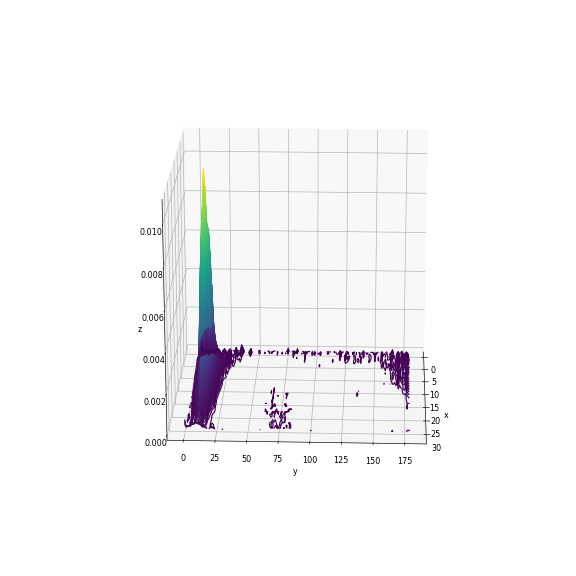

In [69]:
%matplotlib notebook

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_peau, 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(50, 35)
fig.show()

<IPython.core.display.Javascript object>


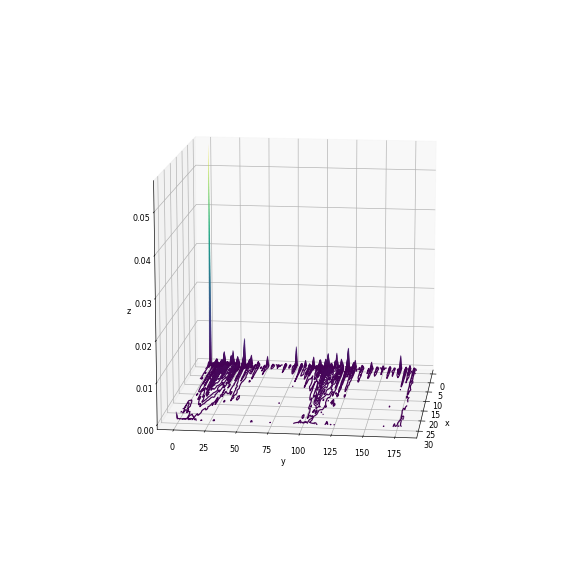

In [70]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_non_peau, 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)

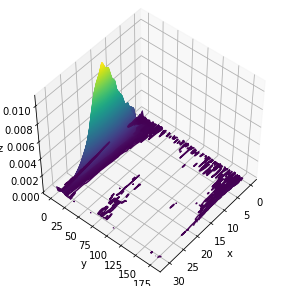

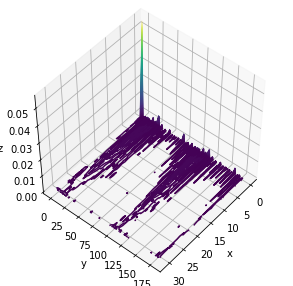

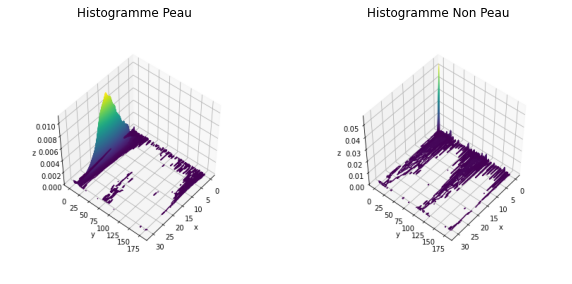

In [76]:
%matplotlib inline

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_peau, 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(50, 40)
plt.savefig('hp.png')

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_non_peau, 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(50, 40)
plt.savefig('hnp.png')


plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv.imread('hp.png'), cv.COLOR_BGR2RGB))
plt.title('Histogramme Peau')
plt.axis("off")

ax = plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(cv.imread('hnp.png'), cv.COLOR_BGR2RGB))
plt.title('Histogramme Non Peau')
plt.axis("off")

plt.savefig('hist.png')

In [71]:
print(sum(sum(Z_peau)))
print(sum(sum(Z_non_peau)))

0.9999999999999999
1.0000000000000002


In [72]:
print(total_peau)
print(total_non_peau)

40599139.0
42927386.0


In [82]:
def evaluation_peau(a, b, Z_peau, Z_non_peau):
    p_peau = Z_peau[a, b]
    p_non_peau = Z_non_peau[a, b]
    return np.argmax([p_non_peau, p_peau])

def evaluation_peau_bayes(a, b, Z_peau, Z_non_peau, t_p, t_n_p):
    u = Z_peau[a, b] * (t_p / (t_p + t_n_p))
    p_peau = u / (u + (Z_non_peau[a, b] * (t_n_p / (t_p + t_n_p))))
    #print(Z_peau[a, b])
    return p_peau
    
def detection_peau(img, Z_peau, Z_non_peau, t_p, t_n_p, s):
    # On converti dans l'espace lab
    img_lab = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    # On modifie les intervalles de a et b
    temp = [0] * 256
    for i in range(256):
        temp[i] = floor(i / (256/ECHELLE))
    
    h, w, d = img_lab.shape
    image = np.asarray(np.zeros((h, w, d), dtype=np.uint8))

    for i in range(h):
        for j in range(w):
            for k in range(1, 3):
                image[i, j][k] = temp[img_lab[i, j][k]]
            image[i, j][0] = img_lab[i, j][0]
    img_lab = image
    
    # On détecte la peau en mettant à 0 les pixels non peau
    for i in range(h):
        for j in range(w):
            if not evaluation_peau_bayes(img_lab[i, j][1], img_lab[i, j][2], Z_peau, Z_non_peau, t_p, t_n_p) >= s:
                for k in range(0, 3):
                    img[i, j][k] = 0
    
    return img

def peau_normale(img, masque):
    x, y = masque.shape

    for i in range(x):
        for j in range(y):
            if masque[i][j] < SEUIL:
                for k in range(0, 3):
                    img[i, j][k] = 0
                    
    return img

In [102]:
img_test = cv.imread('Dataset8_Abdomen/test/original_images/0886.jpg')
masque_test = cv.imread('Dataset8_Abdomen/test/skin_masks/0886.png', cv.IMREAD_GRAYSCALE)
img_test = cv.cvtColor(img_test, cv.COLOR_BGR2RGB)

<ipython-input-82-5222a16e5cd8>:8: RuntimeWarning: invalid value encountered in double_scalars
  p_peau = u / (u + (Z_non_peau[a, b] * (t_n_p / (t_p + t_n_p))))


(-0.5, 226.5, 226.5, -0.5)

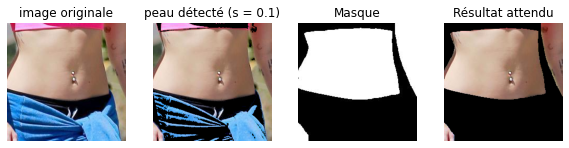

In [103]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(4, 4, 1)
plt.imshow(img_test)
plt.title('image originale')
plt.axis("off")

ax = plt.subplot(4, 4, 2)
plt.imshow(detection_peau(img_test.copy(), Z_peau, Z_non_peau, total_peau, total_non_peau, 0.1))
plt.title('peau détecté (s = 0.1)')
plt.axis("off")

ax = plt.subplot(4, 4, 3)
plt.imshow(masque_test, cmap='gray')
plt.title('Masque')
plt.axis("off")

ax = plt.subplot(4, 4, 4)
plt.imshow(peau_normale(img_test.copy(), masque_test))
plt.title('Résultat attendu')
plt.axis("off")

<ipython-input-82-5222a16e5cd8>:8: RuntimeWarning: invalid value encountered in double_scalars
  p_peau = u / (u + (Z_non_peau[a, b] * (t_n_p / (t_p + t_n_p))))


(-0.5, 226.5, 226.5, -0.5)

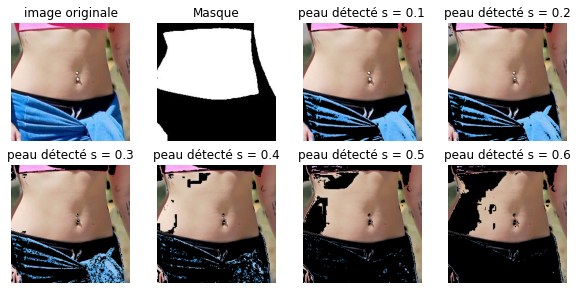

In [104]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(4, 4, 1)
plt.imshow(img_test)
plt.title('image originale')
plt.axis("off")

ax = plt.subplot(4, 4, 2)
plt.imshow(masque_test, cmap='gray')
plt.title('Masque')
plt.axis("off")

ax = plt.subplot(4, 4, 3)
plt.imshow(detection_peau(img_test.copy(), Z_peau, Z_non_peau, total_peau, total_non_peau, 0.1))
plt.title('peau détecté s = 0.1')
plt.axis("off")

ax = plt.subplot(4, 4, 4)
plt.imshow(detection_peau(img_test.copy(), Z_peau, Z_non_peau, total_peau, total_non_peau, 0.2))
plt.title('peau détecté s = 0.2')
plt.axis("off")

ax = plt.subplot(4, 4, 5)
plt.imshow(detection_peau(img_test.copy(), Z_peau, Z_non_peau, total_peau, total_non_peau, 0.3))
plt.title('peau détecté s = 0.3')
plt.axis("off")

ax = plt.subplot(4, 4, 6)
plt.imshow(detection_peau(img_test.copy(), Z_peau, Z_non_peau, total_peau, total_non_peau, 0.4))
plt.title('peau détecté s = 0.4')
plt.axis("off")

ax = plt.subplot(4, 4, 7)
plt.imshow(detection_peau(img_test.copy(), Z_peau, Z_non_peau, total_peau, total_non_peau, 0.5))
plt.title('peau détecté s = 0.5')
plt.axis("off")

ax = plt.subplot(4, 4, 8)
plt.imshow(detection_peau(img_test.copy(), Z_peau, Z_non_peau, total_peau, total_non_peau, 0.6))
plt.title('peau détecté s = 0.6')
plt.axis("off")

In [119]:
# Fonction d'évaluation

def evaluation(t_image, t_mask, Z_peau, Z_non_peau, total_peau, total_non_peau, s):
    t_image = RGB_to_HSV(t_image) # On modifie l'espace de couleur
    t_image = convertHSV256toHSVx(t_image) # On modifie la plage de valeur des pixels
    
    true_positif = 0
    false_positif = 0
    true_negatif = 0
    false_negatif = 0
    
    for index, img in enumerate(t_image):
        mask = t_mask[index]
        x, y = mask.shape
        
        for i in range(x):
            for j in range(y):
                if mask[i][j] > 100:  # peau
                    if evaluation_peau_bayes(img[i, j][1], img[i, j][2], Z_peau, Z_non_peau, total_peau, total_non_peau) >= s:  # peau prédite
                        true_positif += 1
                    else:
                        false_negatif += 1
                else:  # non peau
                    if evaluation_peau_bayes(img[i, j][1], img[i, j][2], Z_peau, Z_non_peau, total_peau, total_non_peau) >= s:  # peau prédite
                        false_positif += 1
                    else:
                        true_negatif += 1
                        
    print(true_positif, false_positif, true_negatif, false_negatif)
                        
    precision = true_positif / (true_positif + false_positif)
    rappel = true_positif / (true_positif + false_negatif)
    f_score = (2 * precision * rappel) / (precision + rappel)
    
    
                        
    return f_score, precision, rappel

In [120]:
# upload images and masks

path_original_img_test = 'Dataset8_Abdomen/test/original_images/'
path_masks_img_test = 'Dataset8_Abdomen/test/skin_masks/'

liste_images = [ f for f in os.listdir(path_original_img_test) if os.path.isfile(os.path.join(path_original_img_test,f)) ]

imgs_test = []
masks_test = []

for img in liste_images:
    image = cv.imread(os.path.join(path_original_img_test, img))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    imgs_test.append(image)
    
for img in liste_images:
    image_mask = cv.imread(os.path.join(path_masks_img_test, img.split('.')[0]+'.png'), cv.IMREAD_GRAYSCALE)
    masks_test.append(image_mask)
    
imgs_test = np.array(imgs_test)
masks_test = np.array(masks_test)
print(masks_test.shape)

(200, 227, 227)


In [121]:
evaluation(imgs_test, masks_test, Z_peau, Z_non_peau, total_peau, total_non_peau, 0.1)

<ipython-input-82-5222a16e5cd8>:8: RuntimeWarning: invalid value encountered in double_scalars
  p_peau = u / (u + (Z_non_peau[a, b] * (t_n_p / (t_p + t_n_p))))


5977867 3321736 466156 540041


(0.7558543186725143, 0.6428088381837376, 0.917145041016228)

In [105]:
def lissage(image):
    result = np.zeros(image.shape)
    
    x, y= image.shape
    
    for i in range(x):
        for j in range(y):
            somme = 0
            compteur = 0
            if i > 0:
                if j > 0:
                    somme += image[i-1, j-1]
                    compteur += 1
                somme += image[i-1, j]
                compteur += 1
                if j < y-1:
                    somme += image[i-1, j+1]
                    compteur += 1
            if j > 0:
                somme += image[i, j-1]
                compteur += 1
            if j < y-1:
                somme += image[i, j+1]
                compteur += 1
            if i < x-1:
                if j > 0:
                    somme += image[i+1, j-1]
                    compteur += 1
                somme += image[i+1, j]
                compteur += 1
                if j < y-1:
                    somme += image[i+1, j+1]
                    compteur += 1
            result[i, j] = image[i, j] + (somme / compteur)
    return result

In [106]:
Z_peau_filtre = lissage(Z_peau)

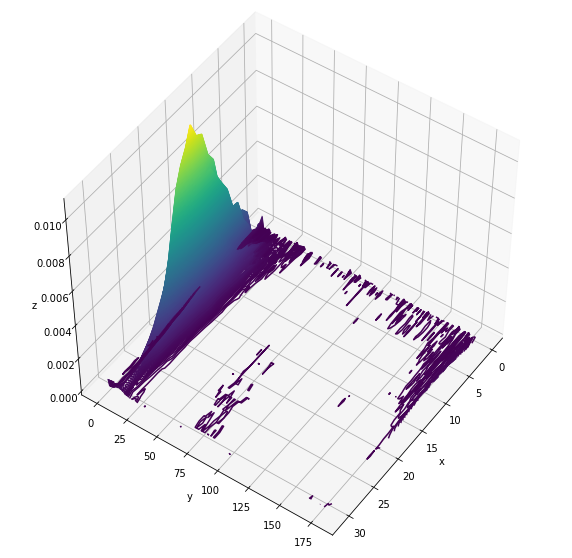

In [107]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_peau, 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(50, 35)


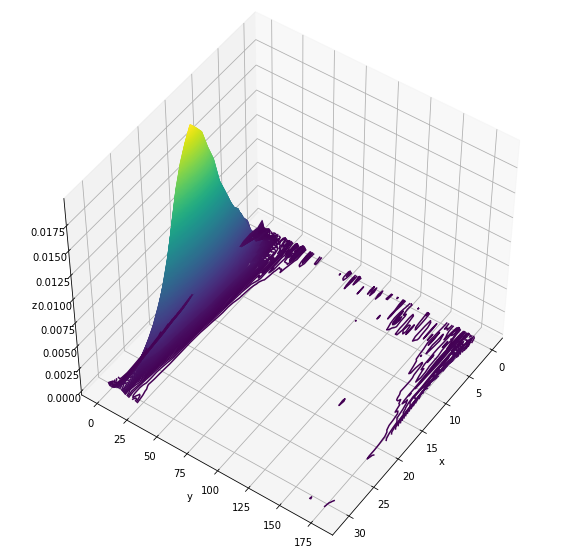

In [108]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_peau_filtre, 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(50, 35)


In [109]:
Z_non_peau_filtre = lissage(Z_non_peau)

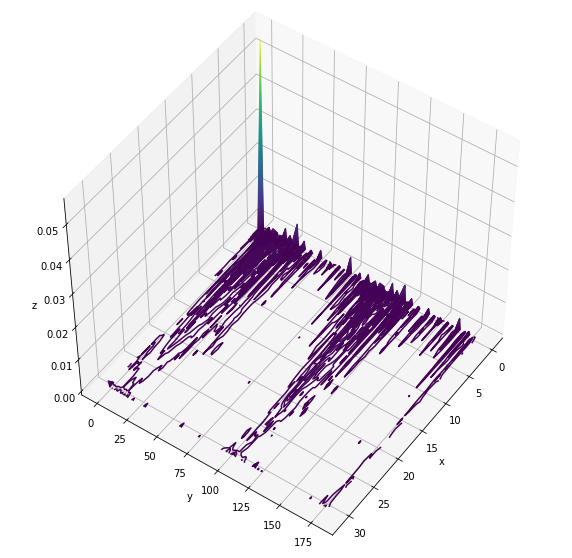

In [110]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_non_peau, 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(50, 35)

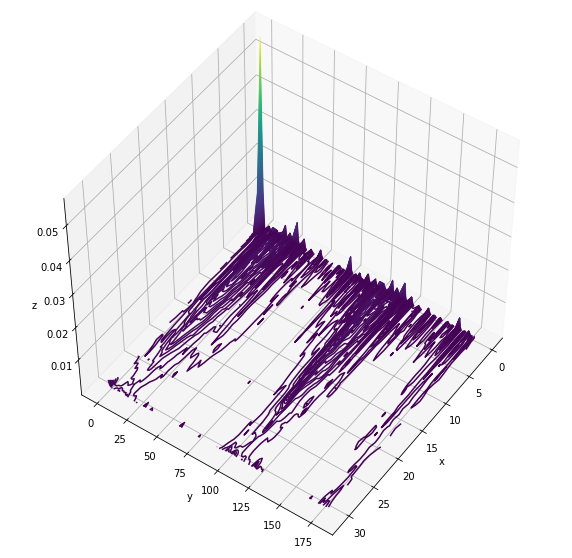

In [111]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_non_peau_filtre, 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(50, 35)

In [122]:
# evaluation avec les histogrammes filtré

evaluation(imgs_test, masks_test, Z_peau_filtre, Z_non_peau_filtre, total_peau, total_non_peau, 0.1)

6013932 3368955 418937 503976


(0.7564316123816451, 0.6409468642220673, 0.9226782581159476)

(-0.5, 226.5, 226.5, -0.5)

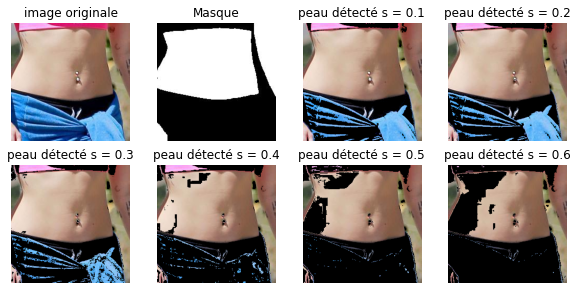

In [123]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(4, 4, 1)
plt.imshow(img_test)
plt.title('image originale')
plt.axis("off")

ax = plt.subplot(4, 4, 2)
plt.imshow(masque_test, cmap='gray')
plt.title('Masque')
plt.axis("off")

ax = plt.subplot(4, 4, 3)
plt.imshow(detection_peau(img_test.copy(), Z_peau_filtre, Z_non_peau_filtre, total_peau, total_non_peau, 0.1))
plt.title('peau détecté s = 0.1')
plt.axis("off")

ax = plt.subplot(4, 4, 4)
plt.imshow(detection_peau(img_test.copy(), Z_peau_filtre, Z_non_peau_filtre, total_peau, total_non_peau, 0.2))
plt.title('peau détecté s = 0.2')
plt.axis("off")

ax = plt.subplot(4, 4, 5)
plt.imshow(detection_peau(img_test.copy(), Z_peau_filtre, Z_non_peau_filtre, total_peau, total_non_peau, 0.3))
plt.title('peau détecté s = 0.3')
plt.axis("off")

ax = plt.subplot(4, 4, 6)
plt.imshow(detection_peau(img_test.copy(), Z_peau_filtre, Z_non_peau_filtre, total_peau, total_non_peau, 0.4))
plt.title('peau détecté s = 0.4')
plt.axis("off")

ax = plt.subplot(4, 4, 7)
plt.imshow(detection_peau(img_test.copy(), Z_peau_filtre, Z_non_peau_filtre, total_peau, total_non_peau, 0.5))
plt.title('peau détecté s = 0.5')
plt.axis("off")

ax = plt.subplot(4, 4, 8)
plt.imshow(detection_peau(img_test.copy(), Z_peau_filtre, Z_non_peau_filtre, total_peau, total_non_peau, 0.6))
plt.title('peau détecté s = 0.6')
plt.axis("off")